# Project
## Aidin Hosseini Nasab
## 98103115
---

Run the cell below if you don't have the required packages installed.

In [ ]:
!pip install catboost
!pip install xgboost
!pip install optuna
!pip install graphviz
!pip install plotly

also you need to download graphviz and add it to your system path. use **choco install graphviz** to download it via cmd if you have windows. <br>
for more Instructions about graphviz Installation visit [here.](https://www.delftstack.com/howto/python/python-graphviz-executables-are-not-found/)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

# loading data
&nbsp;pandas library is used to load data from train.csv file.

In [3]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(810, 12)


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Disease
0,59,M,ASY,130,126,0,Normal,125,N,0.0,Flat,1
1,46,M,ASY,110,238,0,ST,140,Y,1.0,Flat,0
2,56,F,ATA,140,294,0,LVH,153,N,1.3,Flat,0
3,66,F,NAP,146,278,0,LVH,152,N,0.0,Flat,0
4,61,M,ASY,134,0,1,ST,86,N,1.5,Flat,1


cheking if data has null values, As it is shown below, there is no null value in data.

In [4]:
data.isna().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBS               0
RestingECG              0
MaxHR                   0
ExerciseAngina          0
Oldpeak                 0
ST_Slope                0
Disease                 0
dtype: int64

checking which columns are categorical and which are numerical.


In [5]:
data.dtypes

Age                       int64
Sex                      object
ChestPain                object
RestingBloodPressure      int64
Cholesterol               int64
FastingBS                 int64
RestingECG               object
MaxHR                     int64
ExerciseAngina           object
Oldpeak                 float64
ST_Slope                 object
Disease                   int64
dtype: object

in This notebook, each model is trained once with label encoded dataframes and once with one hot encoded dateframes to see which one works better. In the following cells **LabelEncoder** is used to convert the strings into numbers.

## Label encoding
data_cat dataframe contains all categorical columns with label encoding.

In [6]:

leSex = LabelEncoder()
leCP = LabelEncoder()
leECG = LabelEncoder()
leExcercise = LabelEncoder()
leST = LabelEncoder()
data_cat = data.copy()
data_cat['Sex'] = leSex.fit_transform(data_cat['Sex'])
data_cat['ChestPain']=leCP.fit_transform(data_cat['ChestPain'])
data_cat['RestingECG']=leECG.fit_transform(data_cat['RestingECG'])
data_cat['ExerciseAngina']=leExcercise.fit_transform(data_cat['ExerciseAngina'])
data_cat['ST_Slope']=leST.fit_transform(data_cat['ST_Slope'])
data_cat.head()


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Disease
0,59,1,0,130,126,0,1,125,0,0.0,1,1
1,46,1,0,110,238,0,2,140,1,1.0,1,0
2,56,0,1,140,294,0,0,153,0,1.3,1,0
3,66,0,2,146,278,0,0,152,0,0.0,1,0
4,61,1,0,134,0,1,2,86,0,1.5,1,1


## One hot encoding
data_one_hot dataframe contains all categorical columns with one hot encoding. **pandas.get_dummies** is used to convert categorical columns to one hot encoded columns.

In [7]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,Age,RestingBloodPressure,Cholesterol,FastingBS,MaxHR,Oldpeak,Disease,Sex_F,Sex_M,ChestPain_ASY,...,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,59,130,126,0,125,0.0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
1,46,110,238,0,140,1.0,0,0,1,1,...,0,0,0,0,1,0,1,0,1,0
2,56,140,294,0,153,1.3,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,66,146,278,0,152,0.0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,61,134,0,1,86,1.5,1,0,1,1,...,0,0,0,0,1,1,0,0,1,0


## Visualization

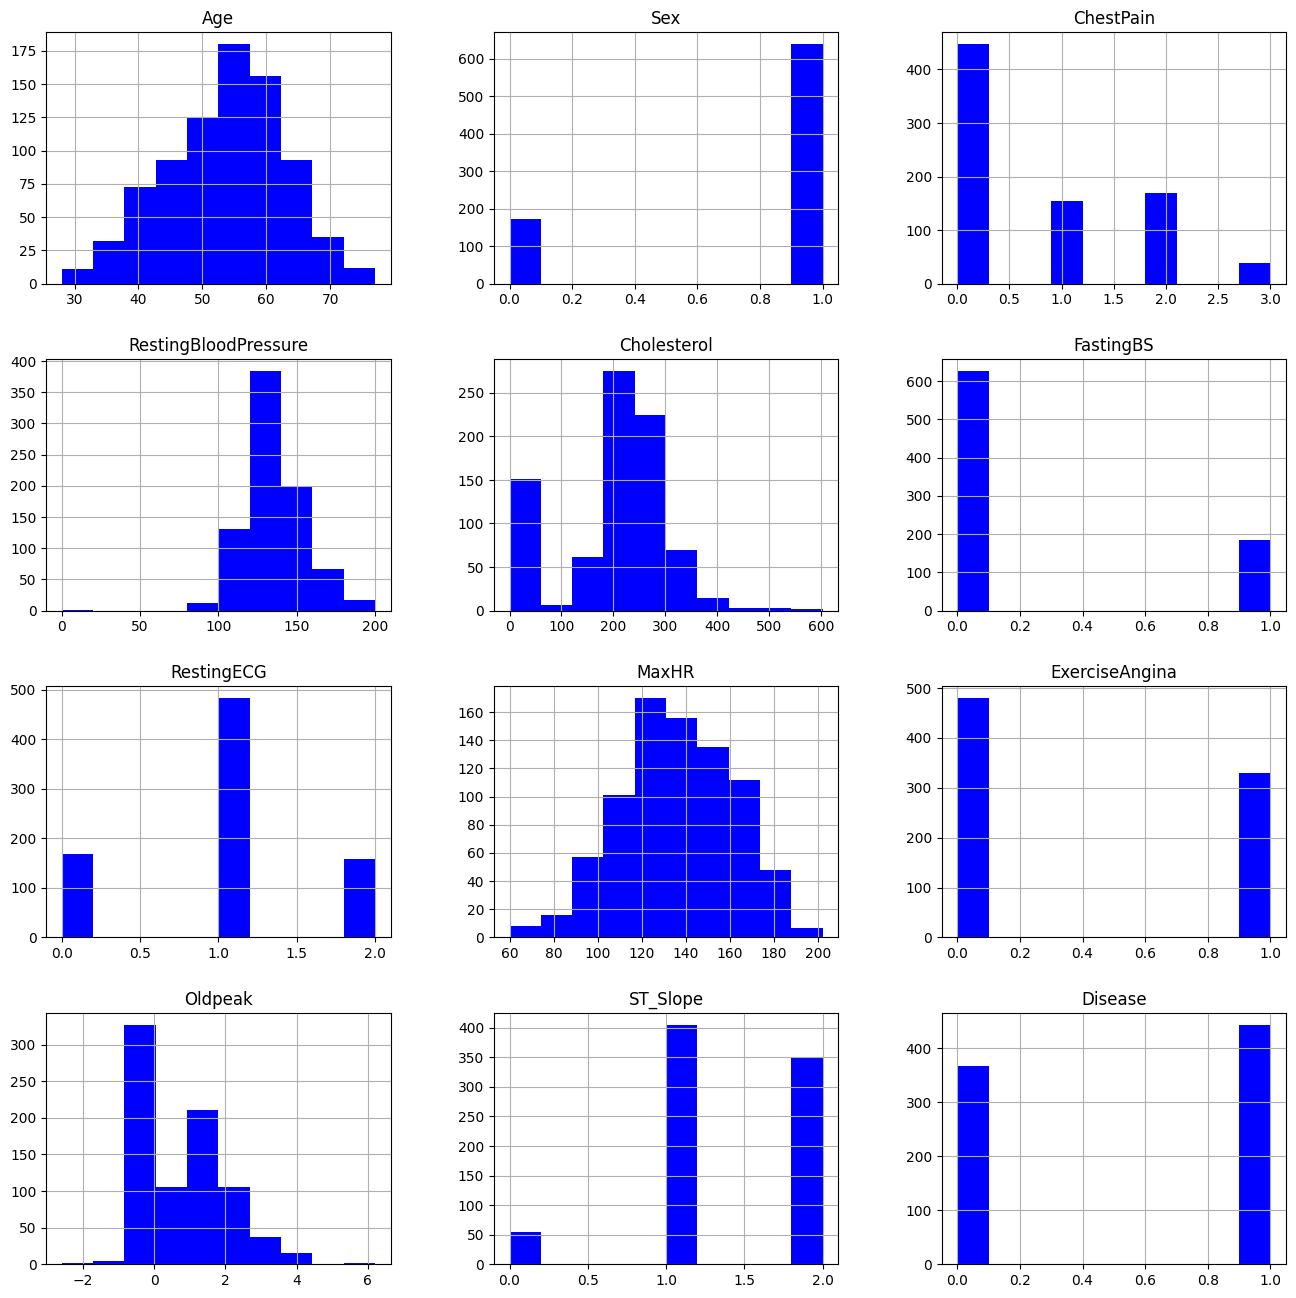

In [8]:
# draw histogram of each parameter
data_cat.hist(figsize=(16,16), color = 'blue')
plt.show()


each column is visualized in the upper cell. As it is shown Resting blood pressure and Cholesterol features have zero values, which is doesn't have meaning. They should be replaced with their mean or median or removed completely.

## Scattering plot of all features
In this section all features are randomly selected for ploting. **Do not plot this cell because features all selected randomly** <br>
if both features are numerical, a scatter plot is drawn. if one of them is categorical, a cat plot is drawn.


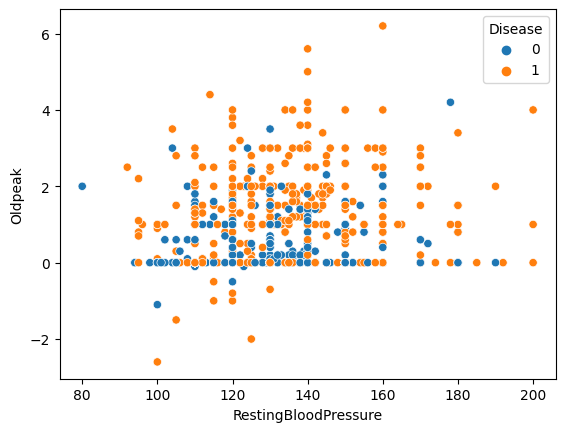

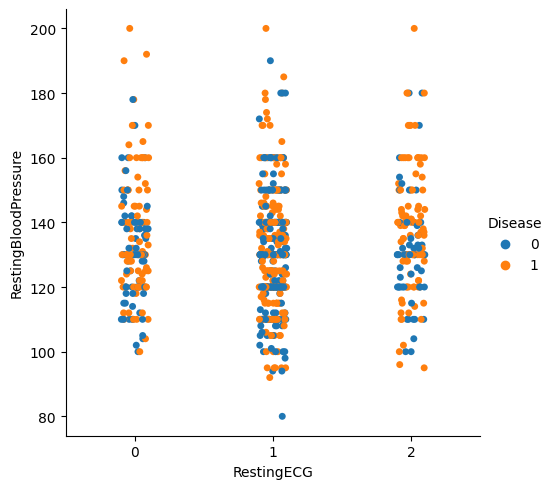

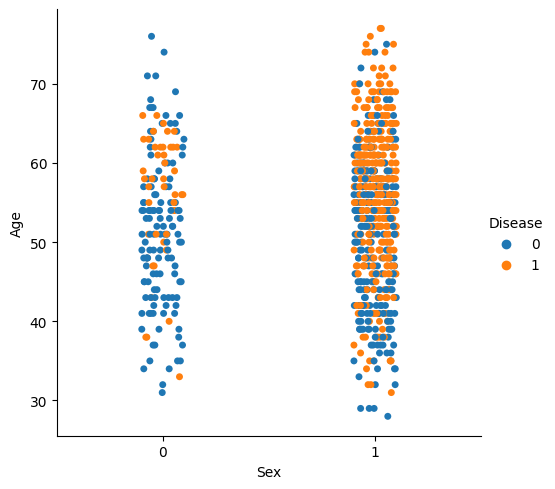

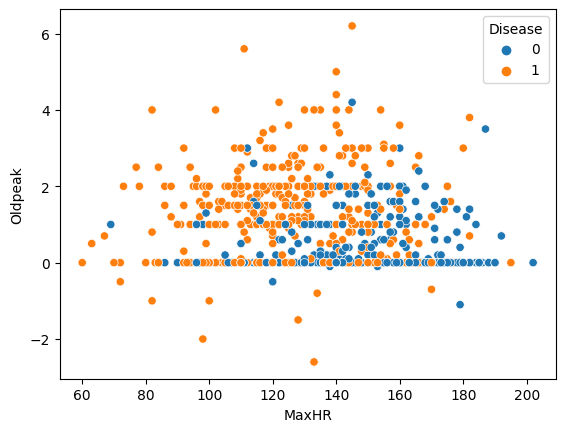

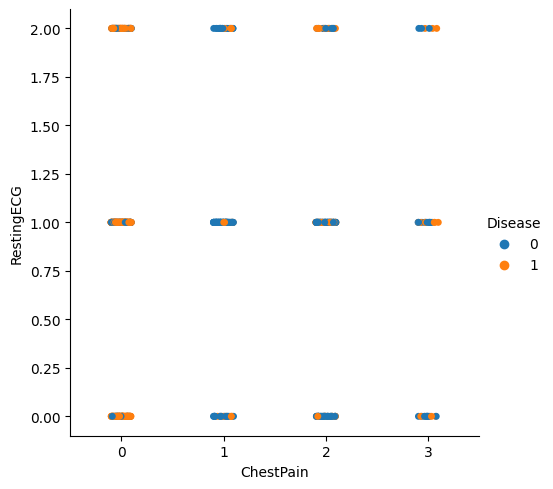

In [106]:
def scatter_plot(dataplt):
    # select two random features
    feature1 = dataplt.columns[np.random.randint(0,dataplt.shape[1]-1)]
    feature2 = dataplt.columns[np.random.randint(0,dataplt.shape[1]-1)]
    categorical_features = ['Sex','ChestPain','RestingECG','ExerciseAngina','ST_Slope', 'FastingBS']
    
    while feature1 == feature2:
        feature2 = dataplt.columns[np.random.randint(0,dataplt.shape[1]-1)]
    # if one of the features is categorical, use catplot
    # if both features are categorical, use barplot
    # if both features are numerical, use scatterplot
    if feature1 in categorical_features and feature2 in categorical_features:
        sns.catplot(x=feature1, y=feature2, hue="Disease", data=dataplt)
    elif feature1 in categorical_features:
        sns.catplot(x=feature1, y=feature2, hue="Disease", data=dataplt)
    elif feature2 in categorical_features:
        sns.catplot(x=feature2, y=feature1, hue="Disease", data=dataplt)
    else:
        sns.scatterplot(x=feature1, y=feature2, hue="Disease", data=dataplt)
     
    plt.show()
        
        
            
    

# draw 5 plots in a plot using subplot and scatter_plot
number_img = 5
for i in range(number_img):
    scatter_plot(data_cat)


as it is demonstrated in the plot, there is no Obivous correlation between features. To make sure, a heatmap is drawn in the next cell.

<Axes: >

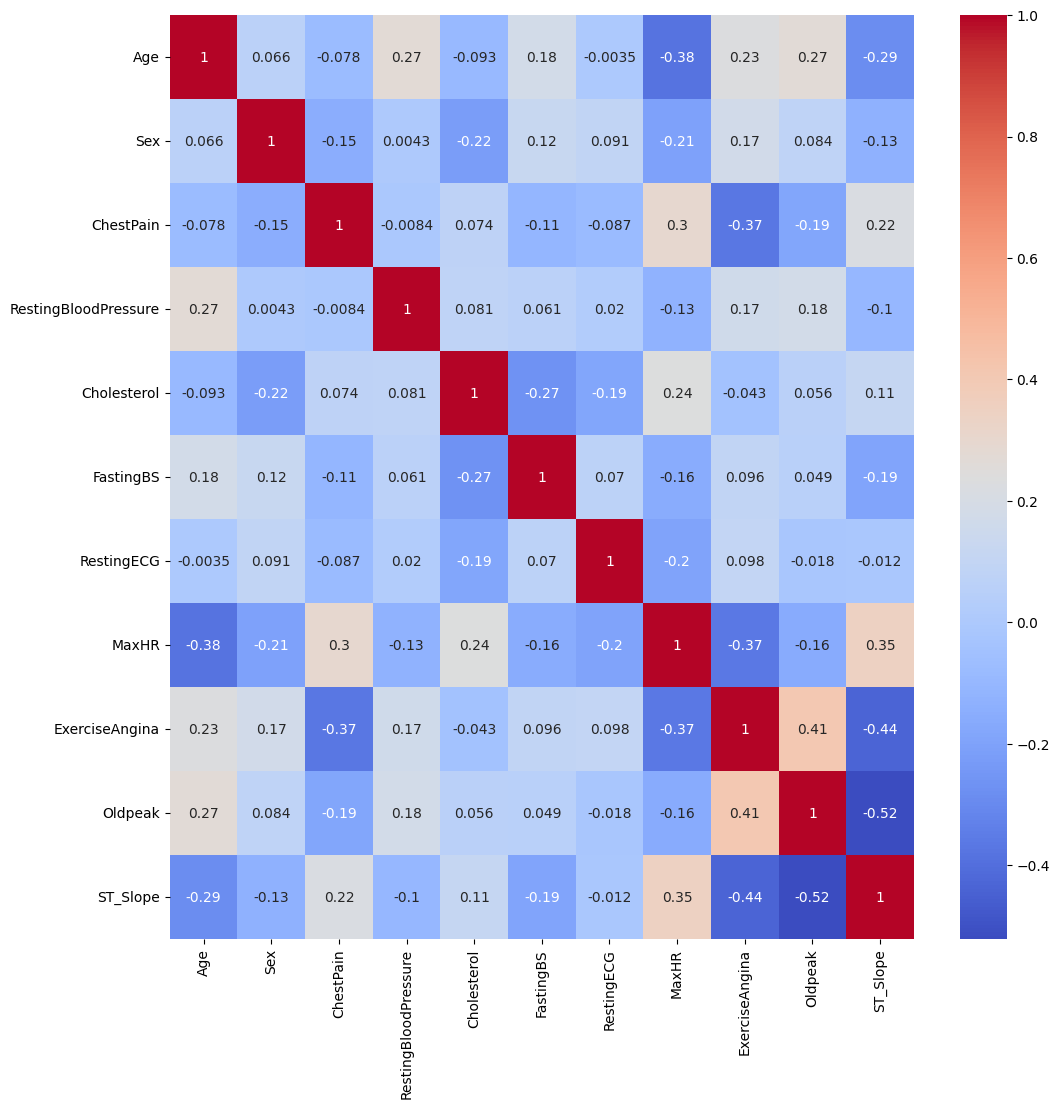

In [102]:
# draw a heatmap to check correlation of features
plt.figure(figsize=(12,12))
sns.heatmap(data_cat.drop('Disease',axis=1).corr(), annot=True, cmap='coolwarm')

## Replacing or Deleting zero values

In [11]:
print("Cholesterol = 0: ", data_cat[data_cat['Cholesterol']==0].shape[0])

print("RestingBP = 0: ", data_cat[data_cat['RestingBloodPressure']==0].shape[0])


Cholesterol = 0:  151
RestingBP = 0:  1


as it is showns above some of the data have 0 cholestrol which is without meaning. Therefore they are missing values and need replacment. Simple imputer are is to replace these datas. 151 of the values have zero value which is big proportion of data. Therefore, it is better to replace them.
also one data has 0 resting blood pressure which is not meaningful. Since this data will be deleted.


To replace the Cheslotrol column values we have to know which data are training, So a pipeline is created for training each classifier.

In [107]:
data_cat = data_cat[data_cat['RestingBloodPressure']!=0]
data_one_hot = data_one_hot[data_one_hot['RestingBloodPressure']!=0]
data = data[data['RestingBloodPressure']!=0]
print("RestingBP (data_cat)= 0: ", data_cat[data_cat['RestingBloodPressure']==0].shape[0])
print("RestingBP (data_one_hot)= 0: ", data_one_hot[data_one_hot['RestingBloodPressure']==0].shape[0])

RestingBP (data_cat)= 0:  0
RestingBP (data_one_hot)= 0:  0


In [109]:
data_cat_scaled = data_cat.drop('Disease', axis=1)

data_one_hot_scaled = data_one_hot.drop('Disease', axis=1)
data_scaled = data.drop('Disease', axis=1)



## Evaluating model function
In this function each model is trained 5 time using cross validation. mean of accuracy, f1 score, precision and recall of the model is calculated and the confusion matrix is drawn for the last fitted model.

In [63]:
def evaluate_model(model, X, y):
    acc = np.array([])
    f1 = np.array([])
    precision = np.array([])
    recall = np.array([])
    c_matrix = np.zeros((2,2))
    for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=8).split(X, y['Disease']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y['Disease'].iloc[train_index], y['Disease'].iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = np.append(acc, accuracy_score(y_test, y_pred))
        f1 = np.append(f1, f1_score(y_test, y_pred))
        precision = np.append(precision, precision_score(y_test, y_pred))
        recall = np.append(recall, recall_score(y_test, y_pred))
        c_matrix = confusion_matrix(y_test, y_pred)

    # print mean and std of accuracy, f1, precision, recall
    print("Accuracy mean: %0.3f (std: %0.3f)" % (acc.mean(), acc.std()))
    print("F1 mean: %0.3f (std: %0.3f)" % (f1.mean(), f1.std()))
    print("Precision mean: %0.3f (std: %0.3f)" % (precision.mean(), precision.std() ))
    print("Recall mean: %0.3f (std: %0.3f)" % (recall.mean(), recall.std() ))
    # print confusion matrix using heatmap
    sns.heatmap(c_matrix, annot=True, fmt='g', cmap='Blues')
    plt.show()

<span style="color:orange; font-size:32px;"> Training of the classifiers takes a lot of time. Please do not re-train them. </span>


# XGBoost Classifier
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification. Xgboost is used for both label encoding and one hot encoding.

In the following cell a pipline is created which has both the simple imputer and the model. Simple imputer is for replacing 0 values of choleterol column with its mean value, and xgb model is used for classification. Different parameters are used to obtain the best classifier using RandomSearchCV.

In [64]:
# create pipeline with imputer replacing only Cholesterol column values and xgb classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
transformer = ColumnTransformer(
    transformers=[
        ('Cholesterol', SimpleImputer(strategy='mean',missing_values=0), ['Cholesterol'])
    ],
    remainder='passthrough'  # This will keep any other columns unchanged
)
pipeline_xgb = Pipeline(steps=[('preprocessing', transformer), ('xgb', xgb_model)])
param_grid_xgb = {
    'xgb__max_depth': [4, 5, 6, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'xgb__subsample': np.arange(0.5, 1.0, 0.1),
    'xgb__colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'xgb__colsample_bylevel': np.arange(0.5, 1.0, 0.1),
    'xgb__n_estimators': [100, 250, 500, 750],
}


### label encoding classification

In [66]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_xgb_lab = RandomizedSearchCV(pipeline_xgb, param_grid_xgb, cv=cv,n_jobs=-1, verbose=3, n_iter=200)
grid_xgb_lab.fit(data_cat_scaled, data_cat['Disease'])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Cholesterol',
                                                                               SimpleImputer(missing_values=0),
                                                                               ['Cholesterol'])])),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=...
                                                            predictor=None,
                                                            random_state=42, ...))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'xgb__colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgb__colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3, 0.4],
                                        'xgb__max_depth': [4, 5, 6, 7],
                                        'xgb__n_estimators': [100, 250, 500,
                                                              750],
                                        'xgb__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   verbose=3)

In [67]:
print("Best parameters:", grid_xgb_lab.best_params_)
print("Best score:", grid_xgb_lab.best_score_)    

Best parameters: {'xgb__subsample': 0.6, 'xgb__n_estimators': 500, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.5, 'xgb__colsample_bylevel': 0.5}
Best score: 0.8726784755770263


Accuracy mean: 0.876 (std: 0.022)
F1 mean: 0.888 (std: 0.024)
Precision mean: 0.871 (std: 0.035)
Recall mean: 0.907 (std: 0.026)


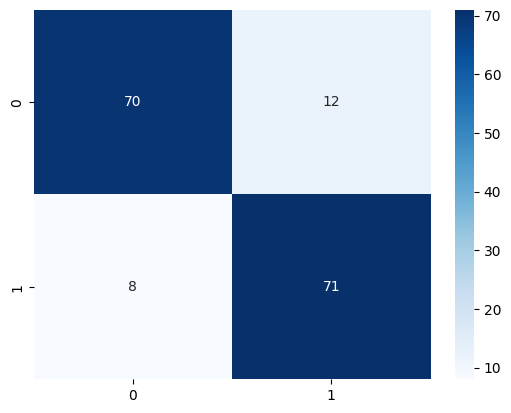

In [68]:
best_xgb_model_lab = grid_xgb_lab.best_estimator_


evaluate_model(best_xgb_model_lab, data_cat_scaled, data_cat)




### one hot encoding classification

In [69]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_xgb_one_hot = RandomizedSearchCV(pipeline_xgb, param_grid_xgb, cv=cv,n_jobs=-1, verbose=3, n_iter=200)
grid_xgb_one_hot.fit(data_one_hot_scaled, data_one_hot['Disease'])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Cholesterol',
                                                                               SimpleImputer(missing_values=0),
                                                                               ['Cholesterol'])])),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=...
                                                            predictor=None,
                                                            random_state=42, ...))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'xgb__colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgb__colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3, 0.4],
                                        'xgb__max_depth': [4, 5, 6, 7],
                                        'xgb__n_estimators': [100, 250, 500,
                                                              750],
                                        'xgb__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   verbose=3)

In [70]:
print("Best parameters:", grid_xgb_one_hot.best_params_)
print("Best score:", grid_xgb_one_hot.best_score_)

Best parameters: {'xgb__subsample': 0.8999999999999999, 'xgb__n_estimators': 500, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.5, 'xgb__colsample_bylevel': 0.6}
Best score: 0.8714439076757918


Accuracy mean: 0.878 (std: 0.017)
F1 mean: 0.889 (std: 0.021)
Precision mean: 0.870 (std: 0.030)
Recall mean: 0.911 (std: 0.031)


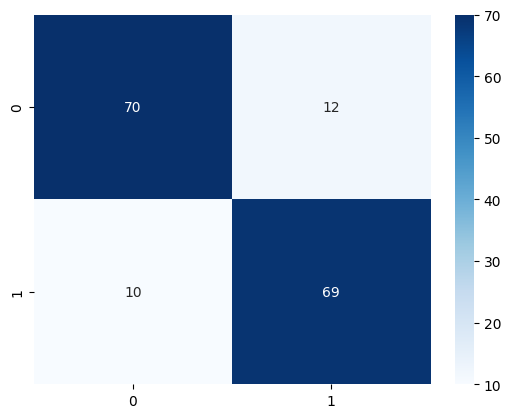

In [71]:
best_xgb_model_one_hot = grid_xgb_one_hot.best_estimator_
evaluate_model(best_xgb_model_one_hot, data_one_hot_scaled, data_one_hot)

Clearly the model works slightly better with one hot encoded dataframe.

# KNN Classifier

Knn classifier was one of my choices, this model was trained for different K values and different methods for calculating the distance. the model was trained for both label encoded and one hot encoded dataframe. Same as the last classifier a pipeline is created.

In [72]:
# import Knn classifier
from sklearn.neighbors import KNeighborsClassifier
# create pipeline with imputer replacing only Cholesterol column values and using standard scaler and Knn classifier
knn_model = KNeighborsClassifier()
transformer = ColumnTransformer(
    transformers=[
        ('Cholesterol', SimpleImputer(strategy='mean',missing_values=0), ['Cholesterol'])
    ],
    remainder='passthrough'  # This will keep any other columns unchanged
)
pipeline_knn = Pipeline(steps=[('preprocessing', transformer), ('scaler', StandardScaler()), ('knn', knn_model)])
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__leaf_size': [10, 20, 30, 40, 50],
}


### label encoding

In [73]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_knn = RandomizedSearchCV(pipeline_knn, param_grid_knn, cv=cv,n_jobs=-1, verbose=3, n_iter=210)
grid_knn.fit(data_cat_scaled, data_cat['Disease'])



Fitting 5 folds for each of 210 candidates, totalling 1050 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Cholesterol',
                                                                               SimpleImputer(missing_values=0),
                                                                               ['Cholesterol'])])),
                                             ('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=210, n_jobs=-1,
                   param_distributions={'knn__leaf_size': [10, 20, 30, 40, 50],
                                        'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': [3, 5, 7, 9, 11, 13,
                                                             15],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   verbose=3)

In [74]:
print("Best parameters:", grid_knn.best_params_)
print("Best score:", grid_knn.best_score_)
means = grid_knn.cv_results_['mean_test_score']
stds = grid_knn.cv_results_['std_test_score']


Best parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 13, 'knn__metric': 'manhattan', 'knn__leaf_size': 10}
Best score: 0.8603251284410703


Accuracy mean: 0.859 (std: 0.011)
F1 mean: 0.872 (std: 0.015)
Precision mean: 0.861 (std: 0.030)
Recall mean: 0.885 (std: 0.020)


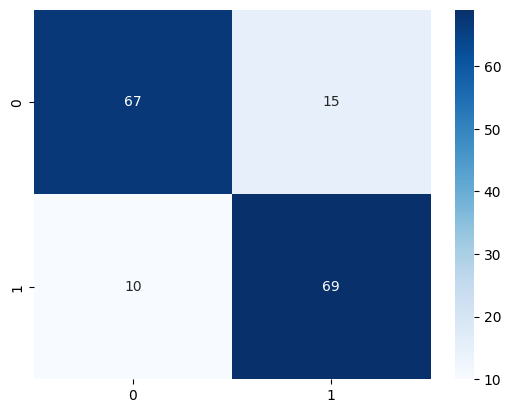

In [75]:
best_knn_model = grid_knn.best_estimator_
evaluate_model(best_knn_model, data_cat_scaled, data_cat)

### one hot encoding

In [76]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_knn_one_hot = RandomizedSearchCV(pipeline_knn, param_grid_knn, cv=cv,n_jobs=-1, verbose=3, n_iter=210)
grid_knn_one_hot.fit(data_one_hot_scaled, data_one_hot['Disease'])


Fitting 5 folds for each of 210 candidates, totalling 1050 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Cholesterol',
                                                                               SimpleImputer(missing_values=0),
                                                                               ['Cholesterol'])])),
                                             ('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=210, n_jobs=-1,
                   param_distributions={'knn__leaf_size': [10, 20, 30, 40, 50],
                                        'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': [3, 5, 7, 9, 11, 13,
                                                             15],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   verbose=3)

In [77]:
print("Best parameters:", grid_knn_one_hot.best_params_)
print("Best score:", grid_knn_one_hot.best_score_)

Best parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 11, 'knn__metric': 'manhattan', 'knn__leaf_size': 10}
Best score: 0.865278736293229


Accuracy mean: 0.863 (std: 0.014)
F1 mean: 0.877 (std: 0.009)
Precision mean: 0.860 (std: 0.025)
Recall mean: 0.898 (std: 0.037)


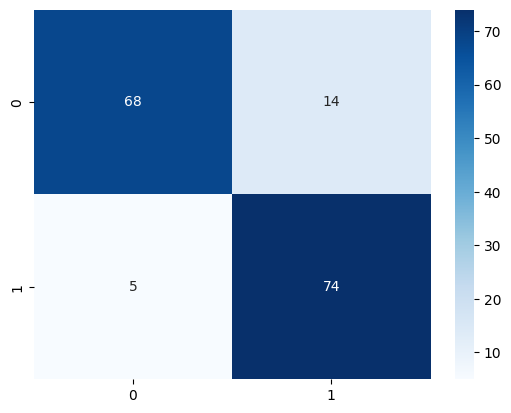

In [78]:
best_knn_model_one_hot = grid_knn_one_hot.best_estimator_
evaluate_model(best_knn_model_one_hot, data_one_hot_scaled, data_one_hot)


#  CatBoost Classifier
my code is similar to [this](https://github.com/optuna/optuna-examples/blob/main/catboost/catboost_pruning.py) github page.<br>
Reference: [CatBoost](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)<br>
catboost, which stands for categorical bossting, is a gradient boosting library that uses decision trees. It is a fast and scalable implementation of gradient boosting framework by Yandex. It provides a wide range of parameters for training and can be used for classification, regression and ranking type of problems.
<br>This library handles categorical data on its own. however I trained the model for all them. the model worked better for one hot encoded dataframe.

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
import optuna
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Optuna library is used for optimization of parameters. optuna supports Catboost library, that's why optuna is used instead of randomizedSearchCV. For using this libray a study has to be created which gets an objective function for optimization. for this function the objective is maximization of it.

In [123]:
def objective(trial : optuna.Trial) -> float:
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "8gb",
        "eval_metric": "Accuracy",
        "verbose": 0,
        #"depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1),
        'iterations': trial.suggest_int('iterations', 10, 1000),
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)
 
    
    
    gbm = CatBoostClassifier(**param)
    purning_callback = optuna.integration.CatBoostPruningCallback(trial, "Accuracy")
    acc = np.array([])
    X = data_one_hot_scaled.copy()
    y = data_one_hot.copy()
    for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=42).split(X, y['Disease']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y['Disease'].iloc[train_index], y['Disease'].iloc[test_index]
        imputer = SimpleImputer(strategy='mean',missing_values=0)
        # impute only Cholesterol column
        X_train['Cholesterol'] = imputer.fit_transform(X_train[['Cholesterol']].values.reshape(-1,1))
        X_test['Cholesterol'] = imputer.transform(X_test[['Cholesterol']].values.reshape(-1,1))
        gbm.fit(X_train, 
                y_train, 
                eval_set=[(X_test, y_test)], 
                early_stopping_rounds=100, verbose=0, 
                callbacks=[purning_callback],
                )
        purning_callback.check_pruned()
        preds = gbm.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        acc = np.append(acc, accuracy_score(y_test, preds))
    return acc.mean()


In [124]:
optuna.logging.set_verbosity(optuna.logging.ERROR)
study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
study.optimize(objective, n_trials=600, timeout=1500,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  0%|          | 0/600 [00:00<?, ?it/s]

Number of finished trials: 600
Best trial:
  Value: 0.8924775707384403
  Params: 
    objective: Logloss
    colsample_bylevel: 0.08390892147695499
    depth: 7
    boosting_type: Ordered
    bootstrap_type: MVS
    learning_rate: 0.39660201610174606
    iterations: 926


mean_imputer array is used to calculate mean of Chelosterol column.

In [83]:
mean_imputer = np.array([])

the parameter were obtained from a previous run. In the following cell the model is trained and a similar method is used to calculate mean, f1 score, precision and recall score of the model. The function is not utilized because the CatBoost library lacks compatibility with the sklearn.Pipeline, which is the reason behind its non-usage.

Accuracy mean: 0.899 (std: 0.011)
F1 mean: 0.908 (std: 0.013)
Precision mean: 0.897 (std: 0.034)
Recall mean: 0.922 (std: 0.036)
imputer_mean: 245.1568805790949


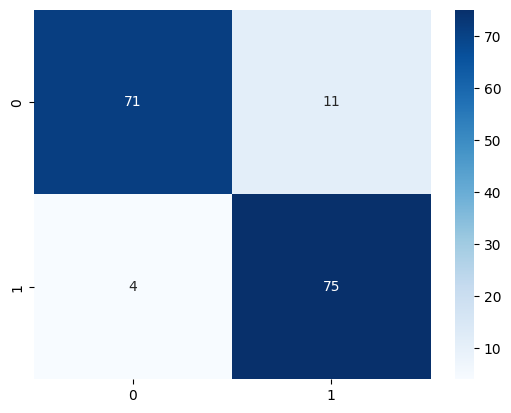

In [84]:
params_catboost = {
    'objective': 'Logloss',
    'colsample_bylevel': 0.06927402547309652,
    'depth': 5,
    'boosting_type': 'Ordered',
    'bootstrap_type': 'MVS',
    'learning_rate': 0.39432937370138194,
    'iterations': 114,
    "used_ram_limit": "8gb",
    "eval_metric": "Accuracy",
    "verbose": 0,
}
gbm = cb.CatBoostClassifier(**params_catboost)
acc = np.array([])
f1 = np.array([])
precision = np.array([])
recall = np.array([])
c_matrix = np.zeros((2,2))
X = data_one_hot_scaled.copy()
y = data_one_hot.copy()

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=8).split(X, y['Disease']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y['Disease'].iloc[train_index], y['Disease'].iloc[test_index]
    imputer = SimpleImputer(strategy='mean',missing_values=0)
    X_train['Cholesterol'] = imputer.fit_transform(X_train[['Cholesterol']].values.reshape(-1,1))
    X_test['Cholesterol'] = imputer.transform(X_test[['Cholesterol']].values.reshape(-1,1))
    # print what value is imputed
    #print(imputer.statistics_[0])
    mean_imputer = np.append(mean_imputer, imputer.statistics_[0])
    gbm.fit(X_train, 
            y_train, 
            eval_set=[(X_test, y_test)], 
            early_stopping_rounds=100, verbose=0, 
            )
    preds = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    acc = np.append(acc, accuracy_score(y_test, preds))
    f1 = np.append(f1, f1_score(y_test, preds))
    precision = np.append(precision, precision_score(y_test, preds))
    recall = np.append(recall, recall_score(y_test, preds))
    c_matrix = confusion_matrix(y_test, preds)

#  mean and std of accuracy, f1, precision, recall
print("Accuracy mean: %0.3f (std: %0.3f)" % (acc.mean(), acc.std()))
print("F1 mean: %0.3f (std: %0.3f)" % (f1.mean(), f1.std()))
print("Precision mean: %0.3f (std: %0.3f)" % (precision.mean(), precision.std() ))
print("Recall mean: %0.3f (std: %0.3f)" % (recall.mean(), recall.std() ))
print("imputer_mean: "+str(mean_imputer.mean()))

sns.heatmap(c_matrix, annot=True, fmt='g', cmap='Blues')
plt.show()


saving the model:

In [85]:
#saving the catboost model which is my best model in a json file
# uncomment the next line to save the model
# gbm.save_model('catboost_model.json', format="json")

# Feature importance
feature importance determines the contribution of each feature to determining the target variable. It's demonstrated in the following plot that the most important feature is the ST_slope_flat in the one hot encoded dataframe. The resting blood pressure and Resintg ECG_ST are most irrelevant variables which have the least importance.<br>
In the Decision tree-based methods which Catboost algorithm is one them, feature importance is related to how much each feature reduces impurity or error when making splits in tree.

<BarContainer object of 20 artists>

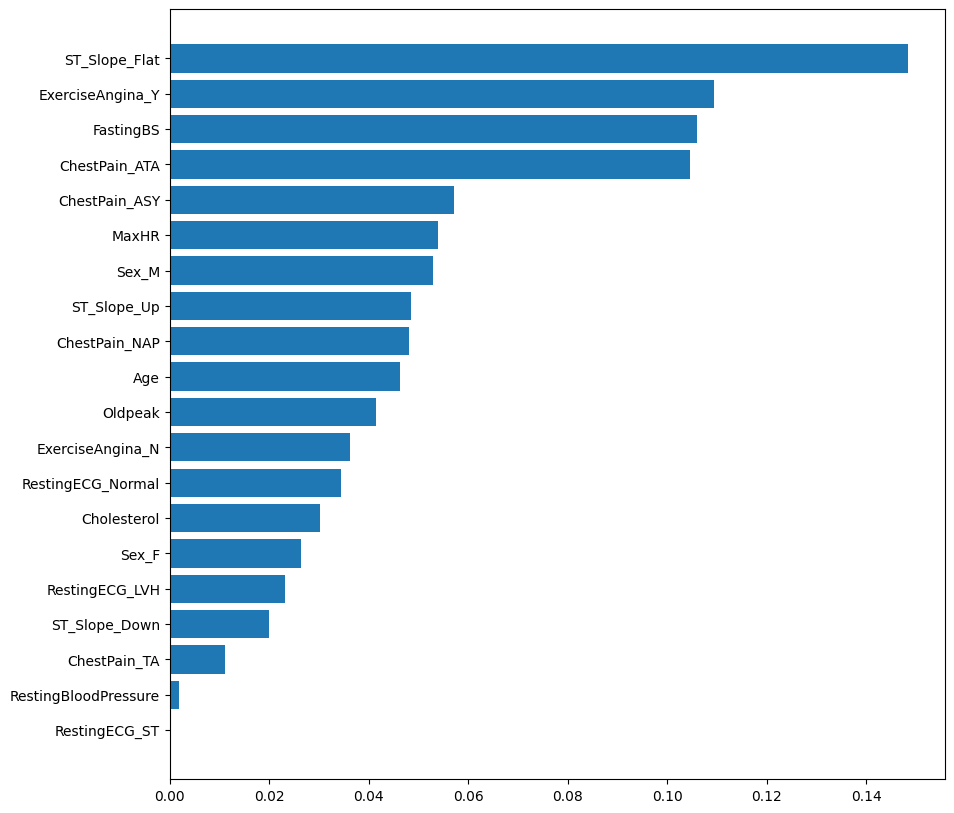

In [86]:
# plot feature importance
feature_importance = gbm.get_feature_importance()
feature_names = X.columns
feature_importance_sort = []
feature_names_sort = []
# put feature importnce and names in the same list
for score, name in sorted(zip(feature_importance, feature_names)):
    feature_importance_sort.append(score)
    feature_names_sort.append(name)
# plot the bar chart of feature importance
plt.figure(figsize=(10, 10))
# plot using sort_importance
plt.barh(feature_names_sort,feature_importance_sort/feature_importance.sum())


AS it is shown below, When Maximum heart rate is low and Age increases the probability of having a disease increases which is a rational interpration by the model becuase having a heart Disease is more probable at older age.
p.s: my model has 113 trees so it's impossible to draw them all.

<Figure size 1600x1600 with 0 Axes>

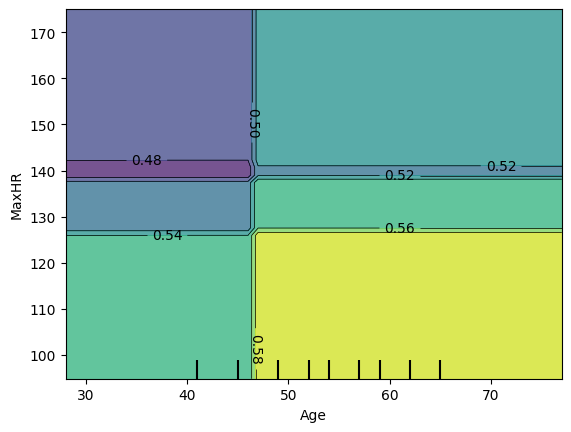

In [122]:
# partialDependenceDisplay for Cholestrol and MaxHR
from sklearn.inspection import PartialDependenceDisplay
feature1 = 'Age'
feature2 = 'MaxHR'
X = data_one_hot_scaled.copy()
y = data_one_hot['Disease']
imputer = SimpleImputer(strategy='constant',missing_values=0, fill_value=245.1595434955887)
plt.figure(figsize=(16, 16))
PartialDependenceDisplay.from_estimator(gbm, X,grid_resolution=50, features=[(feature1,feature2)])
